In [9]:
import pymc3 as pm
import numpy as np
import theano
import seaborn
import matplotlib.pyplot as plt
seaborn.set_context('poster')
seaborn.set_style('white')
seaborn.set(color_codes=True)

%matplotlib inline


In [10]:
loc1 = 10
scale1 = 1
size1 = 4

loc2 = 12
scale2 = 3
size2 = 6

sample1 = np.random.normal(loc=loc1, scale=scale1, size=size1)
sample2 = np.random.normal(loc=loc2, scale=scale2, size=size2)

with pm.Model() as model:
    mu1 = pm.Flat('mu1')
    sd1 = pm.Exponential('sd1', lam=1)
    data1 = pm.Normal('data1', mu=mu1, sd=sd1, observed=sample1)

    mu2 = pm.Flat('mu2')
    sd2 = pm.Exponential('sd2', lam=1)
    data2 = pm.Normal('data2', mu=mu2, sd=sd2, observed=sample2)
    
    diff_mu = pm.Deterministic('diff_mu', mu2 - mu1)
    diff_sd = pm.Deterministic('diff_sd', sd2 - sd1)
    effect_size = pm.Deterministic('effect size',
                                    diff_mu / pm.sqrt((sd1**2 + sd2**2) / 2))

Applied log-transform to sd1 and added transformed sd1_log_ to model.
Applied log-transform to sd2 and added transformed sd2_log_ to model.


In [11]:
sample1

array([ 10.77314698,   9.08341384,   8.42329962,   9.08677967])

In [12]:
sample2

array([ 11.0371604 ,   8.80005255,  13.50710406,  13.81414033,
         4.36966595,   9.56333598])

In [17]:
with model:
    params = pm.variational.advi(n=100000)
    trace = pm.variational.sample_vp(params, draws=5000)

Iteration 0 [0%]: ELBO = -205.36
Iteration 10000 [10%]: Average ELBO = -1019.31
Iteration 20000 [20%]: Average ELBO = -38.77
Iteration 30000 [30%]: Average ELBO = -32.01
Iteration 40000 [40%]: Average ELBO = -25.8
Iteration 50000 [50%]: Average ELBO = -23.25
Iteration 60000 [60%]: Average ELBO = -23.03
Iteration 70000 [70%]: Average ELBO = -23.09
Iteration 80000 [80%]: Average ELBO = -23.09
Iteration 90000 [90%]: Average ELBO = -23.07
Finished [100%]: Average ELBO = -23.02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113ee2780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120a53b00>]], dtype=object)

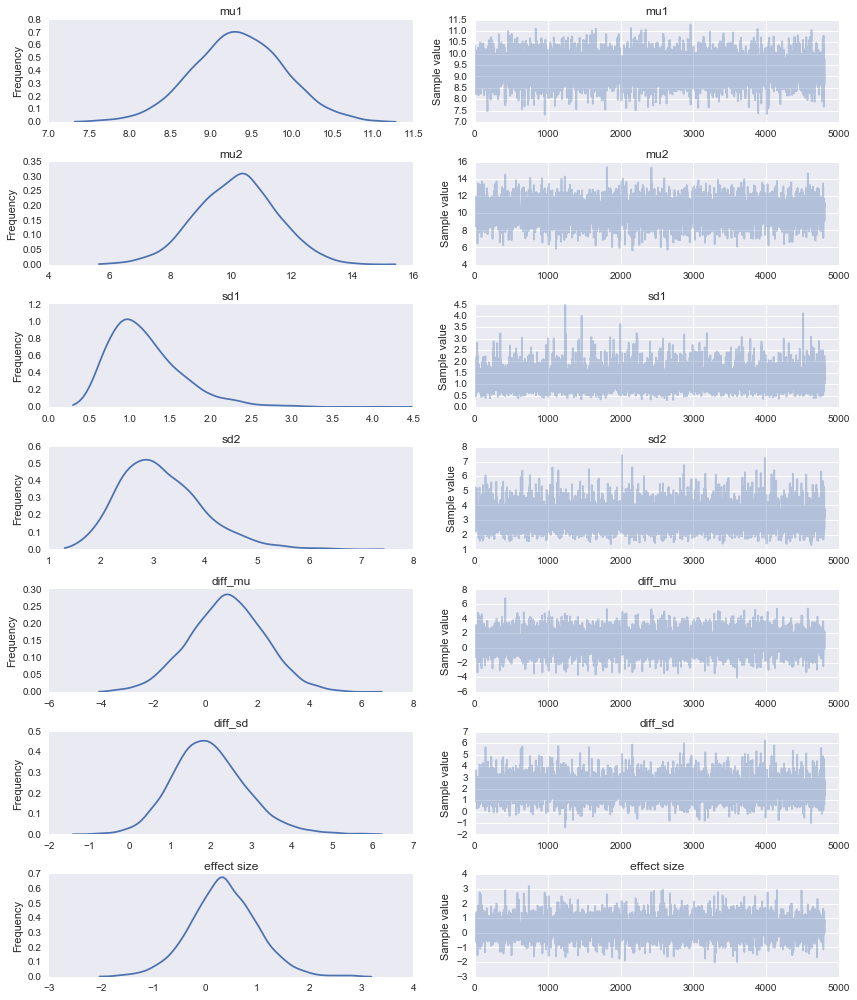

In [18]:
pm.traceplot(trace[200:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1211be470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1213a7f60>], dtype=object)

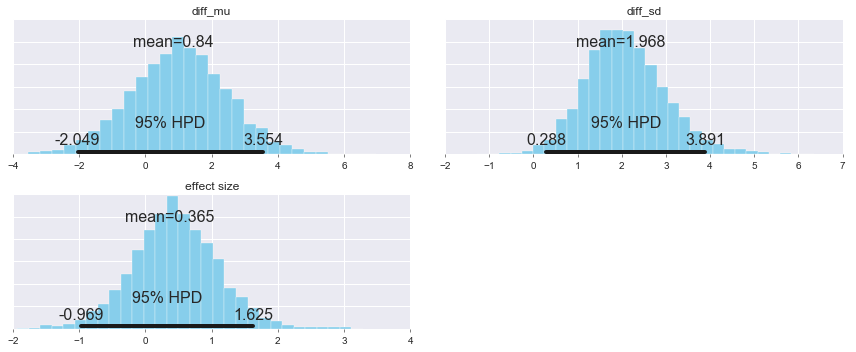

In [19]:
pm.plot_posterior(trace[200:], varnames=['diff_mu', 'diff_sd', 'effect size'], color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121476208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1217c30f0>], dtype=object)

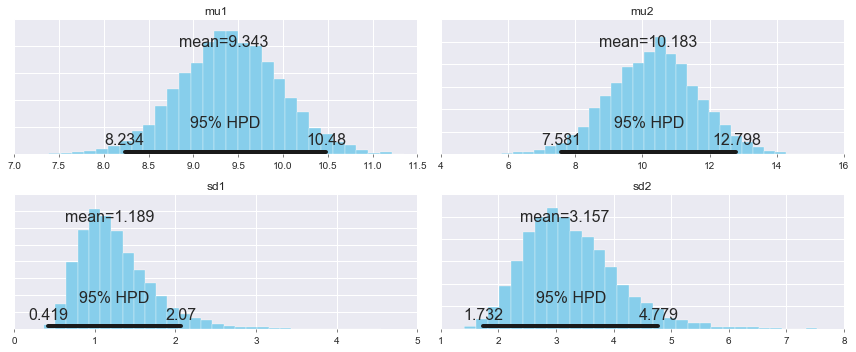

In [20]:
pm.plot_posterior(trace[200:], varnames=['mu1', 'mu2', 'sd1', 'sd2'], color='#87ceeb',)